In [2]:
pwd

'/Users/keisukemurota/Documents/todo/worms/python/visualize'

In [7]:
"""plot average sign and loss as heatmap."""
import numpy as np  # noqa
# import os  # noqa
# import matplotlib.gridspec as gridspec  # noqa
import matplotlib.pyplot as plt  # noqa
import pandas as pd  # noqa
import itertools  # noqa
# import pandas  # noqa

import sys  # noqa
from pathlib import Path  # noqa
PYTHON_DIR = Path("/Users/keisukemurota/Documents/todo/worms/python")
sys.path.insert(0, PYTHON_DIR.resolve().as_posix())
from rmsKit import utils  # noqa

IMAGE_PATH = PYTHON_DIR / "visualize" / "image"
WORM_RESULT_PATH = PYTHON_DIR / "rmsKit" / "array" / "quetta"

model_name = "FF2D"
image_model_dir = IMAGE_PATH / model_name
worm_result_path = WORM_RESULT_PATH / (model_name+"_loc")

N = 10**6
BETA_THRES = 20

if not IMAGE_PATH.exists():
    raise FileNotFoundError("{} does not exist.".format(IMAGE_PATH.resolve()))
if not WORM_RESULT_PATH.exists():
    raise FileNotFoundError("{} does not exist.".format(WORM_RESULT_PATH.resolve()))
if not worm_result_path.exists():
    raise FileNotFoundError("{} does not exist.".format(worm_result_path.resolve()))

summary_files = utils.path.find_summary_files(worm_result_path)
df = utils.path.get_df_from_summary_files(summary_files, N)
df = df[df.sweeps == N]
df = df[df["T"] >= 1 / BETA_THRES]
logger.info("temeprature simulated: {}".format(np.sort(df["T"].unique())))
logger.info("L simulated: {}".format(np.sort(df.n_sites.unique())))

params_df = utils.param_dict_normalize(df['ham_path'].apply(utils.extract_parameters_from_path))
df = pd.concat([df, params_df], axis=1)
df = df.rename(columns={"T": "temperature"})
print(df.columns)

image_model_dir.mkdir(parents=False, exist_ok=True)


01.21 12:43 -- INFO   temeprature simulated: [1.]
01.21 12:43 -- INFO   L simulated: [16]
Index(['model_name', 'alpha', 'temperature', 'bc', 'n_sites', 'u_path',
       'ham_path', 'sweeps', 'as', 'as_error', 'e', 'e_error', 'c', 'c_error',
       'm', 'm_error', 'chi', 'chi_error', 'loss_func', 'loss', 'init_loss',
       's', 'r', 'd', 'seed'],
      dtype='object')


In [15]:
df.seed = df.seed.astype(np.int64)
seed_list = np.sort(df.seed.unique())

In [18]:
df_u = df[~df.loss.isna()]
df_h = df[df.loss.isna()]

In [63]:
df_u.n_sites

0       16
2       16
4       16
6       16
8       16
        ..
1990    16
1992    16
1994    16
1996    16
1998    16
Name: n_sites, Length: 1000, dtype: int64

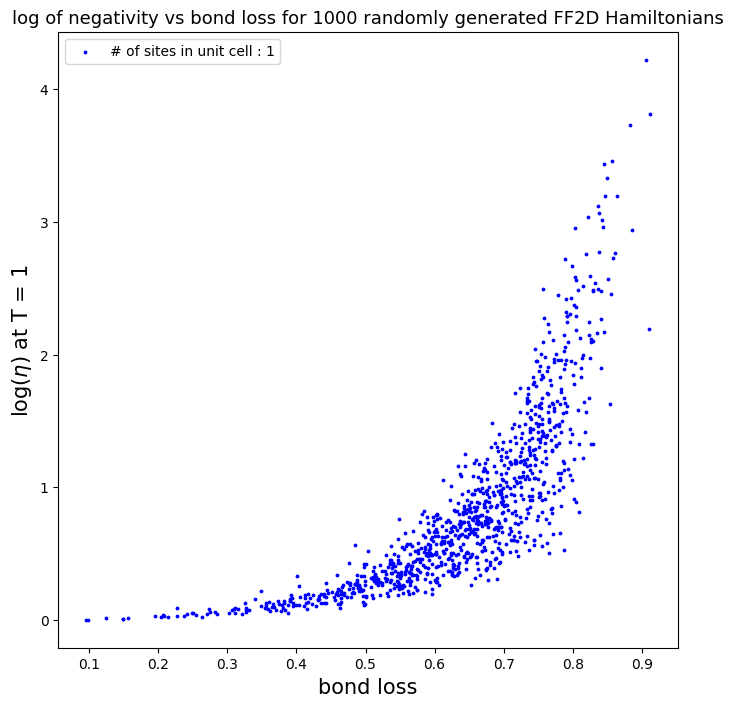

In [106]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(df_u["loss"].values, np.log(1/df_u["as"].values), s = 3, c = "blue", label = "# of sites in unit cell : 1")
# ax.scatter((- df2['loss_u'] + df2["loss"])/2, - df2['neg_ori'] + df2['neg_opt'], s = 3, c = "red", label = "# of sites in unit cell : 2")
# min_ = (- df['loss_u'] +  df["loss"]).min()
# max_ = (- df['loss_u'] +  df["loss"]).max()
# x = np.linspace(0.1, 1, 1000)
# ax.plot(x, 6*x, label = "linear line ( y = 6x)", linewidth=3, c = "black")
ax.set_title("log of negativity vs bond loss for 1000 randomly generated FF2D Hamiltonians", fontsize=13)
ax.legend()
# fig.tight_layout()
ax.set_xlabel("bond loss", fontsize=15)
ax.set_ylabel("log($\eta$) at T = 1", fontsize=15)
plot_filename = PYTHON_DIR / f'visualize/image/FF2D/scatter_neg_sps_{8}_bd_{2}_lt_{1}.pdf'
fig.savefig(plot_filename, dpi=300, format = "pdf")


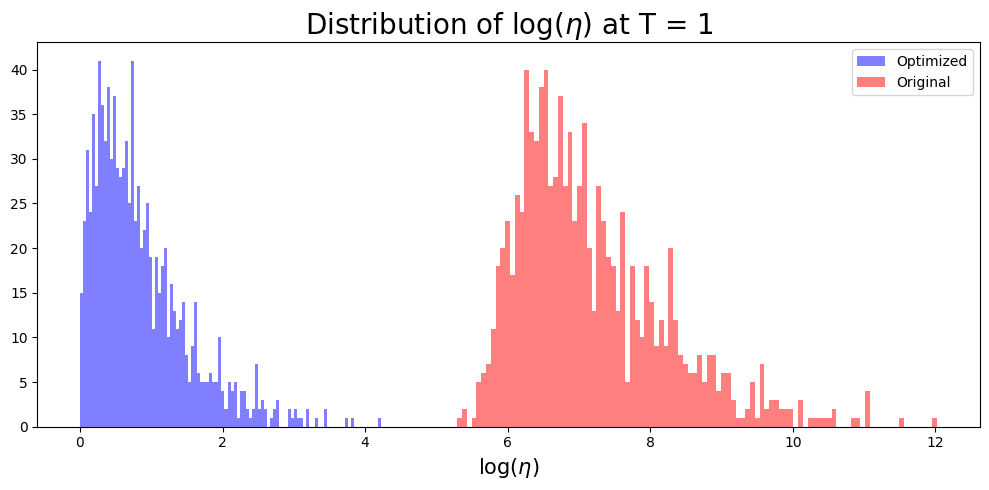

In [108]:


fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(np.log(1/df_u['as']), label = "Optimized", bins = 100, alpha = 0.5, color = "b")
ax.hist(np.log(1/np.abs(df_h['as'])), label = "Original", bins = 100, alpha = 0.5, color = "r")

# ax.hist(1/df_h['as'], label = "Original", bins = 100, alpha = 0.5, color = "b")
# ax.hist(-df2['neg_opt'], label = "Optimized", bins = 100, alpha = 0.5, color = "b")
# 
# ax.hist(df2['neg_opt'], label = "# of sites in unit cell : 2", bins = 100)

ax.set_title("Distribution of $\log(\eta)$ at T = 1", fontsize=20)
ax.set_xlabel("log($\eta$)", fontsize=15)

ax.legend()
fig.tight_layout()
plot_filename = PYTHON_DIR / f'visualize/image/FF2D/hist_neg_sps_{8}_bd_{2}_lt_{1}.pdf'
fig.savefig(plot_filename, dpi=300, format = "pdf")


01.21 13:05 -- WARNING  No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


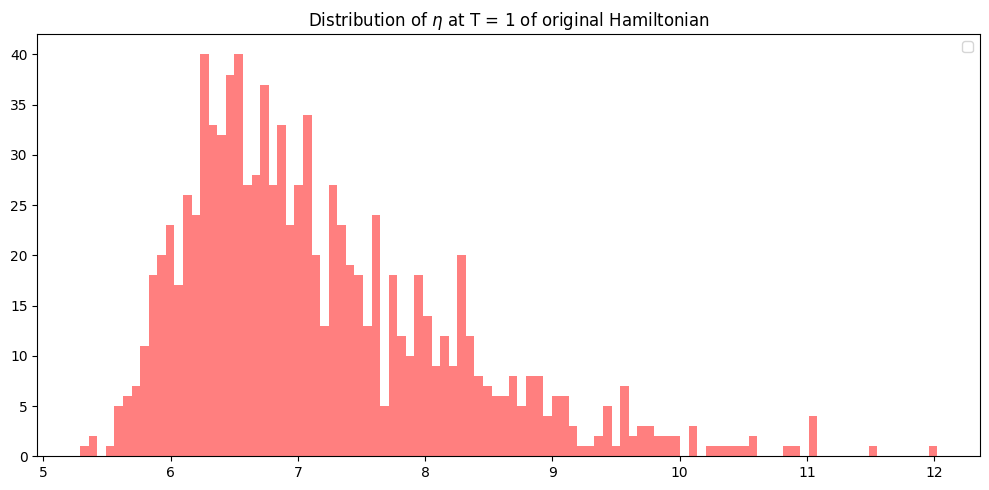

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(np.log(1/np.abs(df_h['as'])), bins = 100, alpha = 0.5, color = "r")
ax.set_title("Distribution of $\eta$ at T = 1 of original Hamiltonian")
ax.legend()
fig.tight_layout()
# plot_filename = pythonPath / f'visualize/image/FF1D/hist_neg_sps_{3}_bd_{bd}_lt_{1}.pdf'
# fig.savefig(plot_filename, dpi=300, format = "pdf")
